In [182]:
# Data
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Prepprc
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import model_selection

# pipline
from sklearn.pipeline import make_pipeline, FeatureUnion

# ML
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#Metrics

from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc


In [136]:
df = pd.read_pickle('../data/clean_pass_01.pkl')

In [137]:
df.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41340 entries, 0 to 42474
Data columns (total 10 columns):
term                  41340 non-null object
grade                 41340 non-null object
sub_grade             41340 non-null object
home_ownership        41340 non-null object
loan_status           41340 non-null object
purpose               41340 non-null object
zip_code              41340 non-null object
addr_state            41340 non-null object
earliest_cr_line      41340 non-null object
last_credit_pull_d    41340 non-null object
dtypes: object(10)
memory usage: 3.5+ MB


In [138]:
df.last_credit_pull_d.head()

0    Jun-2016
1    Sep-2013
2    Jun-2016
3    Apr-2016
5    Jan-2016
Name: last_credit_pull_d, dtype: object

In [144]:
# for now drop zip and dates
df2 = df.drop(['zip_code','earliest_cr_line','last_credit_pull_d'], axis=1)

In [145]:
# drop secound predictor
df2 = df2.drop(['loan_status'],axis=1)

In [146]:
# drop the grade as double infor to subgrade
df2 = df2.drop(['grade'],axis=1)

In [147]:
df2.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41340 entries, 0 to 42474
Data columns (total 5 columns):
term              41340 non-null object
sub_grade         41340 non-null object
home_ownership    41340 non-null object
purpose           41340 non-null object
addr_state        41340 non-null object
dtypes: object(5)
memory usage: 1.9+ MB


In [148]:
# make all objects categorys
for c in df2.select_dtypes('object').columns:
    df2[c] = df2[c].astype('category')
    
df2.select_dtypes('category').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41340 entries, 0 to 42474
Data columns (total 5 columns):
term              41340 non-null category
sub_grade         41340 non-null category
home_ownership    41340 non-null category
purpose           41340 non-null category
addr_state        41340 non-null category
dtypes: category(5)
memory usage: 530.3 KB


In [149]:
df2.select_dtypes('int').info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 41340 entries, 0 to 42474
Data columns (total 3 columns):
pub_rec_bankruptcies    41340 non-null int64
has_made_pymnt          41340 non-null int64
target                  41340 non-null int64
dtypes: int64(3)
memory usage: 1.3 MB


In [150]:
df2.pub_rec_bankruptcies = df2.pub_rec_bankruptcies.astype('bool') 
df2.has_made_pymnt = df2.has_made_pymnt.astype('bool') 
df2.select_dtypes('bool').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41340 entries, 0 to 42474
Data columns (total 3 columns):
pub_rec_bankruptcies    41340 non-null bool
has_made_pymnt          41340 non-null bool
not_policy              41340 non-null bool
dtypes: bool(3)
memory usage: 444.1 KB


In [151]:
# numerics... fine for now ... needs a closer look
df2.select_dtypes(np.number).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41340 entries, 0 to 42474
Data columns (total 26 columns):
loan_amnt                  41340 non-null float64
funded_amnt                41340 non-null float64
funded_amnt_inv            41340 non-null float64
int_rate                   41340 non-null float64
installment                41340 non-null float64
emp_length                 41340 non-null float64
annual_inc                 41340 non-null float64
dti                        41340 non-null float64
delinq_2yrs                41340 non-null float64
inq_last_6mths             41340 non-null float64
open_acc                   41340 non-null float64
pub_rec                    41340 non-null float64
revol_bal                  41340 non-null float64
revol_util                 41340 non-null float64
total_acc                  41340 non-null float64
out_prncp                  41340 non-null float64
out_prncp_inv              41340 non-null float64
total_pymnt                41340 non-null

## Feature importnace try with dummy to recall names


In [152]:
df3 = pd.get_dummies(df2, drop_first=True)
for i in df3.columns:
    print(i)


loan_amnt
funded_amnt
funded_amnt_inv
int_rate
installment
emp_length
annual_inc
dti
delinq_2yrs
inq_last_6mths
open_acc
pub_rec
revol_bal
revol_util
total_acc
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_amnt
pub_rec_bankruptcies
has_made_pymnt
not_policy
target
term_ 60 months
sub_grade_A2
sub_grade_A3
sub_grade_A4
sub_grade_A5
sub_grade_B1
sub_grade_B2
sub_grade_B3
sub_grade_B4
sub_grade_B5
sub_grade_C1
sub_grade_C2
sub_grade_C3
sub_grade_C4
sub_grade_C5
sub_grade_D1
sub_grade_D2
sub_grade_D3
sub_grade_D4
sub_grade_D5
sub_grade_E1
sub_grade_E2
sub_grade_E3
sub_grade_E4
sub_grade_E5
sub_grade_F1
sub_grade_F2
sub_grade_F3
sub_grade_F4
sub_grade_F5
sub_grade_G1
sub_grade_G2
sub_grade_G3
sub_grade_G4
sub_grade_G5
home_ownership_OTHER
home_ownership_OWN
home_ownership_RENT
purpose_credit_card
purpose_debt_consolidation
purpose_educational
purpose_home_improvement
purpose_house
purpose_ma

In [153]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41340 entries, 0 to 42474
Columns: 129 entries, loan_amnt to addr_state_WY
dtypes: bool(3), float64(25), int64(1), uint8(100)
memory usage: 12.6 MB


## create pipline parts for DF use

In [154]:
from sklearn.base import BaseEstimator, TransformerMixin

class TypeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, dtype):
        self.dtype = dtype

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X.select_dtypes(include=[self.dtype])
    
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)

        try:
            return X[self.columns]
        except KeyError:
            cols_error = list(set(self.columns) - set(X.columns))
            raise KeyError("The DataFrame does not include the columns: %s" % cols_error)
            
 

In [155]:
x_cols =  df3.drop(['target'], axis=1).columns
x_cols.shape

(128,)

In [156]:
preprocess_pipeline = make_pipeline(
    ColumnSelector(columns=x_cols),
    FeatureUnion(transformer_list=[
        ("numeric_features", make_pipeline(
            TypeSelector(np.number),
            StandardScaler()
        )),
        ("bool_features", make_pipeline(
            TypeSelector('bool'),
        )),
        #("categorical_features", make_pipeline(
        #    TypeSelector("category"),
        #    OneHotEncoder()
        #)),
    ]))

In [157]:
preprocess_pipeline.fit(df3.drop(['target'], axis=1))
X_transformed = preprocess_pipeline.transform(df3.drop(['target'], axis=1))    
X_transformed.shape

(41340, 128)

In [158]:
y = df3['target']

In [183]:
# Using Random Forest to gain an insight on Feature Importance
#clf = DecisionTreeClassifier()
clf = RandomForestClassifier()
clf.fit(X_transformed, y)
importance = clf.feature_importances_


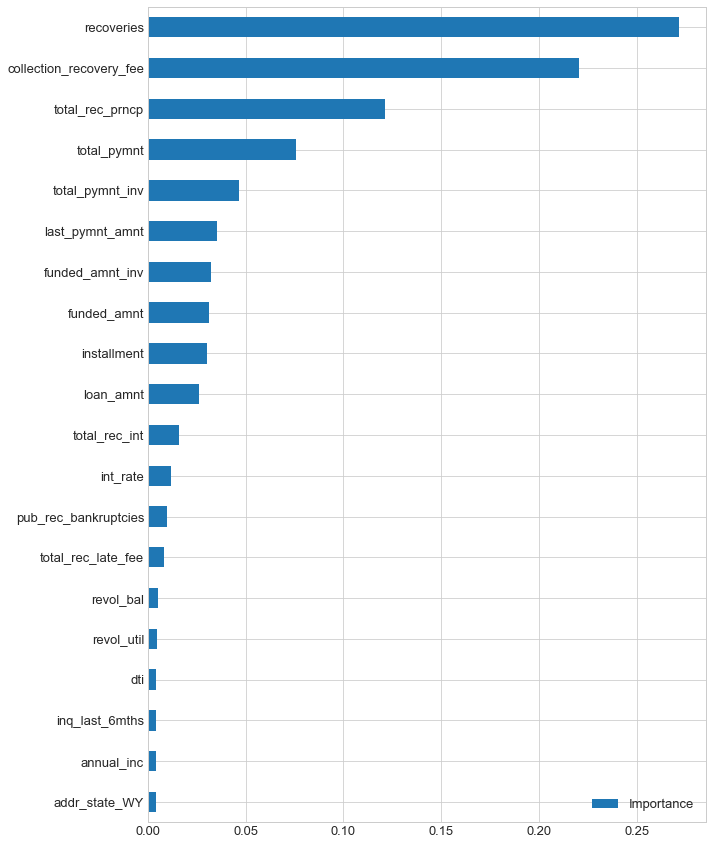

In [184]:
plt.style.use('seaborn-whitegrid')
importance = pd.DataFrame(importance, index=df3.drop(['target'], axis=1).columns, columns=["Importance"])
importance = importance.sort_values(['Importance'], ascending=True)
plt.rc('font', size=13)
importance.tail(n=20).plot(kind='barh', figsize=(10,15));

In [177]:
clf.tree_.n_leaves

225

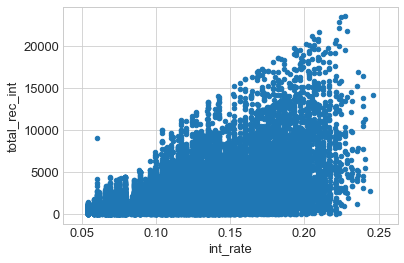

In [178]:
df3.plot.scatter(y='total_rec_int',x='int_rate')

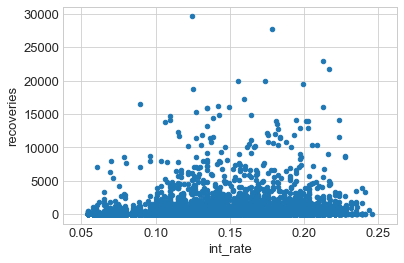

In [181]:
df3.plot.scatter(y='recoveries',x='int_rate') 

In [ ]:
df3.